## <font color='purple'>Lab Assignment 09: Random Forest Classifier </font> <br>
Supervised Machine Learning Lab<br>
### <font color='green'>Kaustubh Raykar
PRN : 21070126048 <br> 
<break> AIML A3 </font>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

### <font color='blue'> 1. Use the attached stroke prediction data </font>

In [58]:
df = pd.read_csv('/content/Random Forest assignment dataset.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [59]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [60]:
df.describe

<bound method NDFrame.describe of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_ty

In [61]:
df.shape 

(4981, 11)

In [62]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [63]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [64]:
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


### <font color='blue'> 2. Apply EDA for the dataset </font>

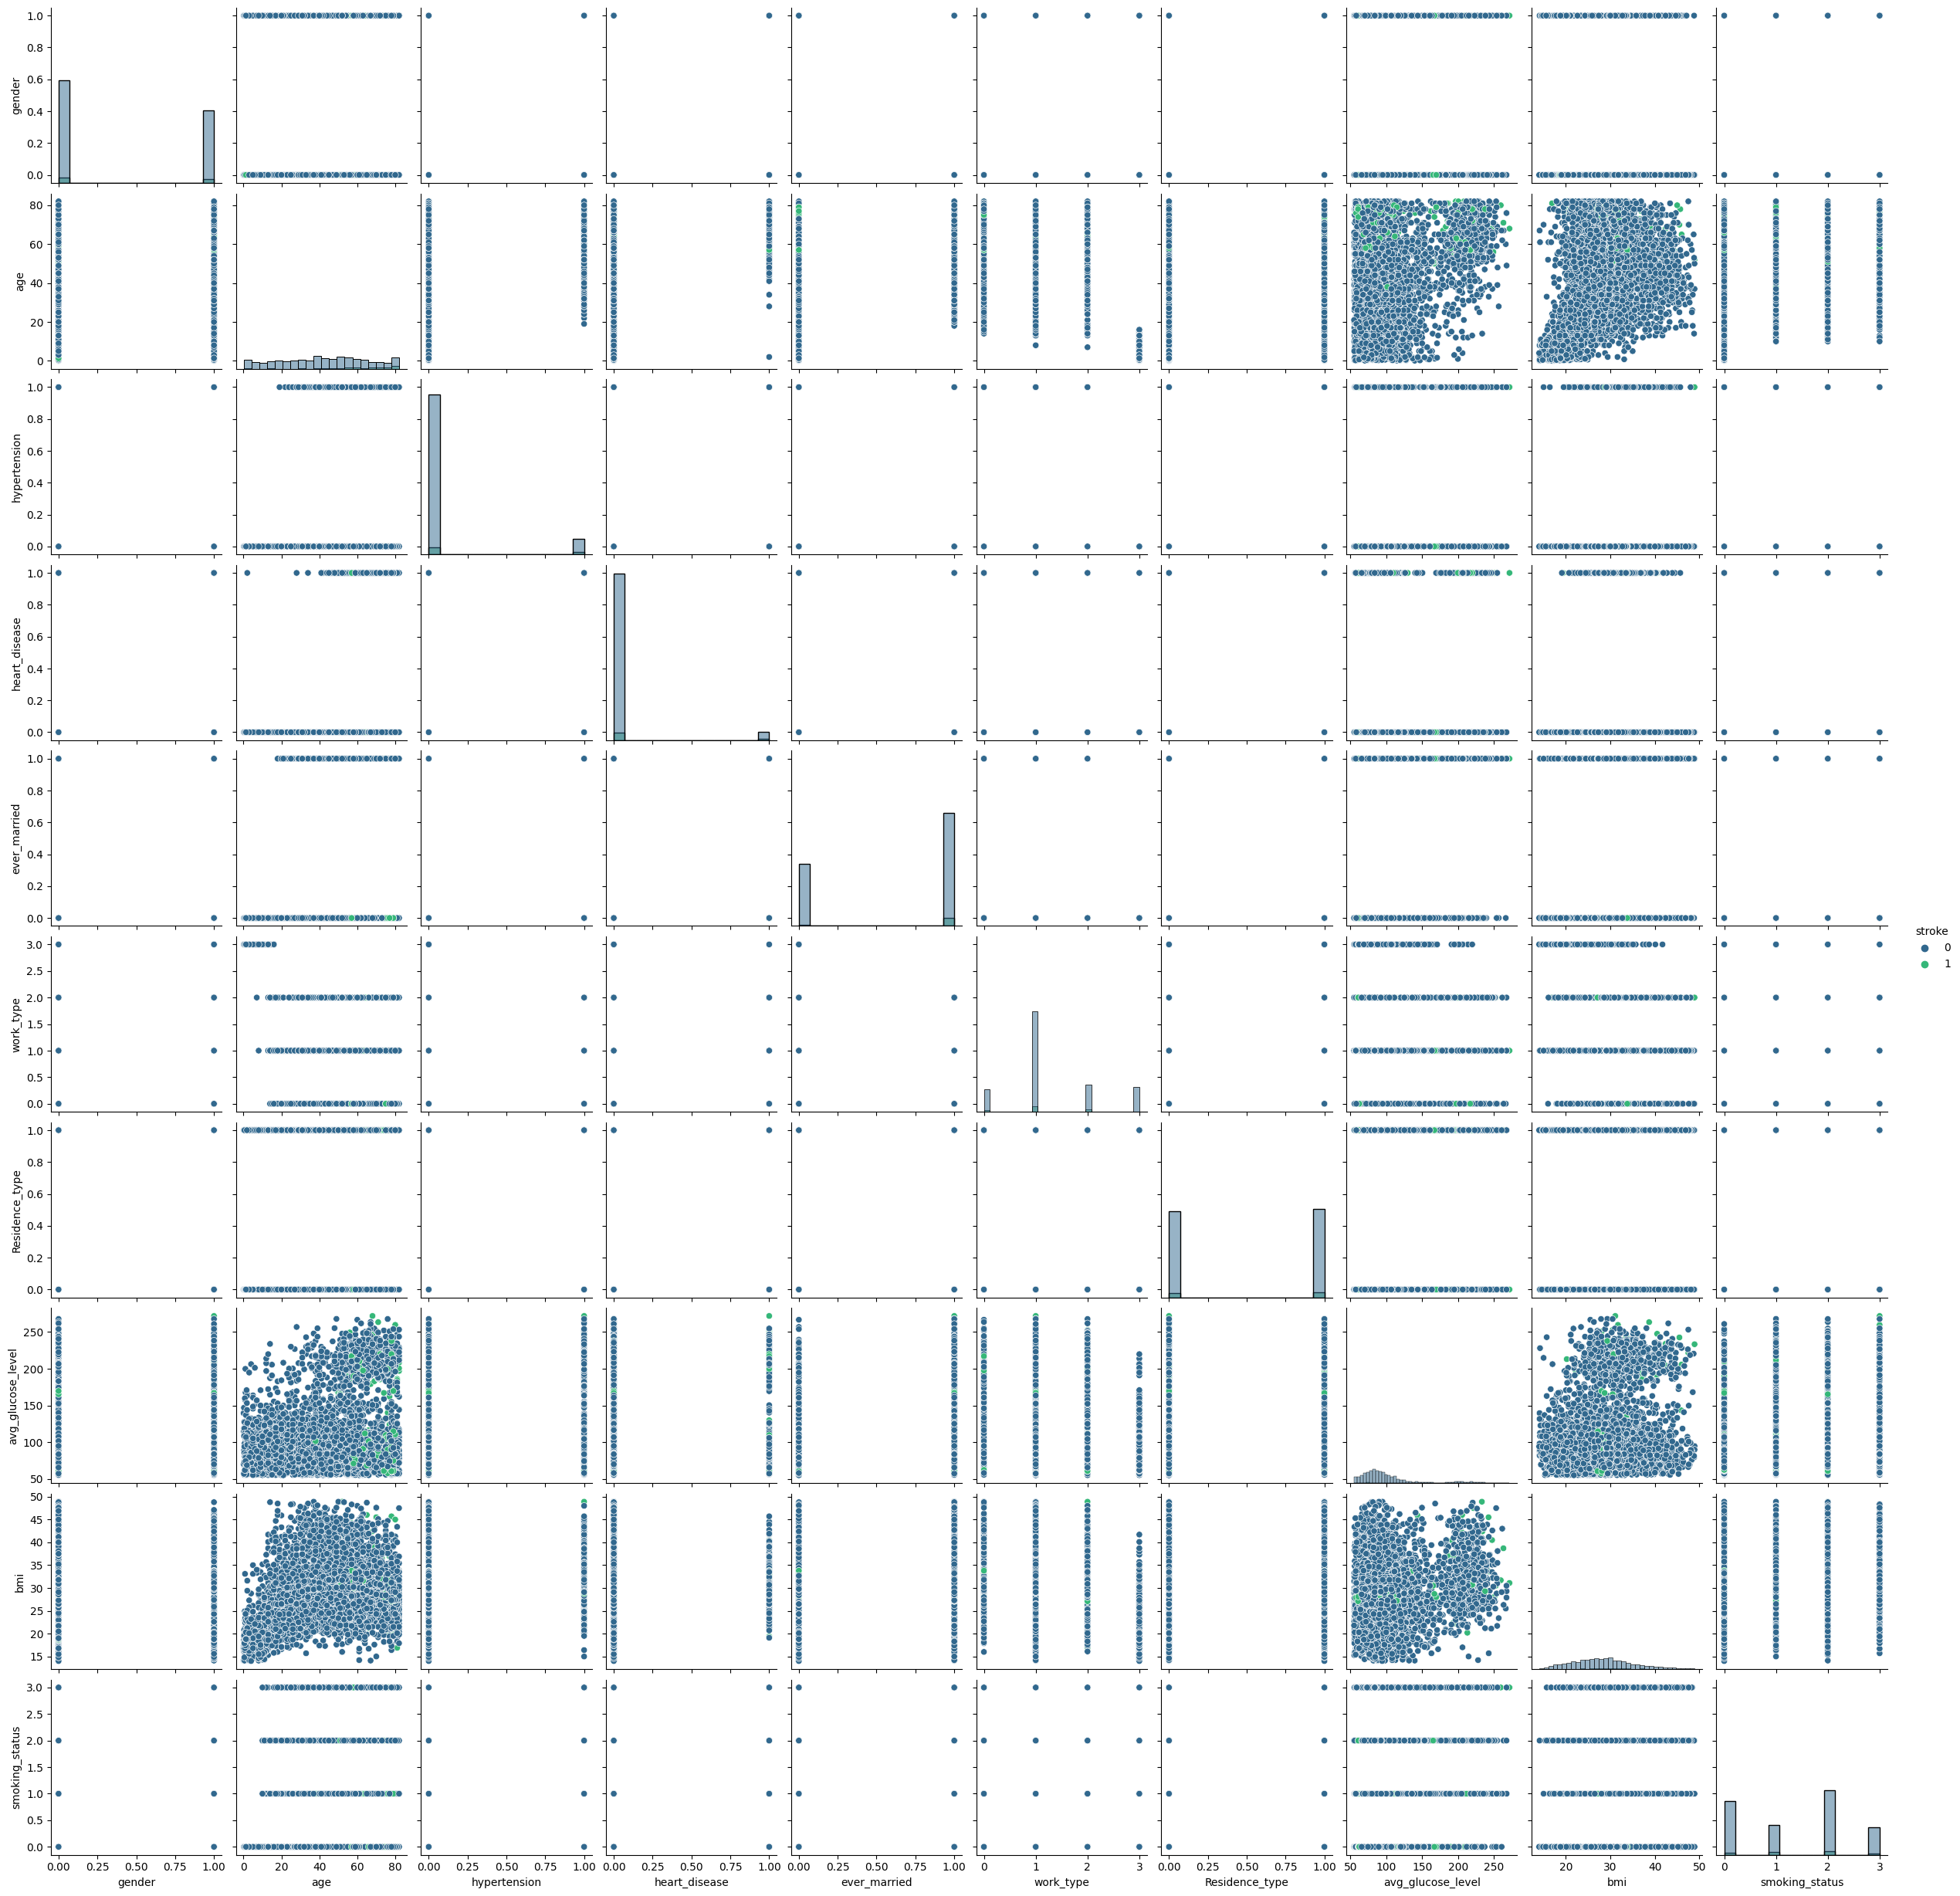

In [81]:
import seaborn as sns

cols = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
        'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
        'smoking_status', 'stroke']
sns.pairplot(df[cols], hue='stroke', diag_kind='hist', palette='viridis')


<Axes: >

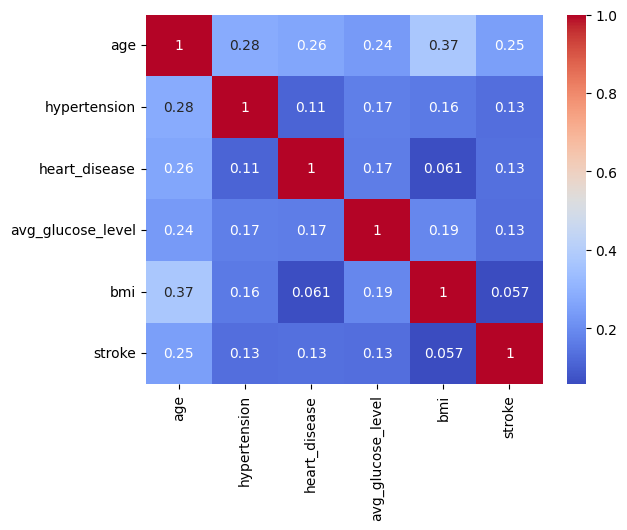

In [66]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [67]:
import plotly.express as px

fig = px.scatter(df, x="avg_glucose_level", y="bmi", color="stroke")
fig.show()


In [68]:
import plotly.graph_objs as go

df_grouped = df.groupby(['heart_disease', 'smoking_status'], as_index=False)['stroke'].mean()

fig = go.Figure(data=[
    go.Bar(name='Never smoked', x=df_grouped[df_grouped['smoking_status'] == 'never smoked']['heart_disease'], 
           y=df_grouped[df_grouped['smoking_status'] == 'never smoked']['stroke'], marker_color='#1f77b4'),
    go.Bar(name='Formerly smoked', x=df_grouped[df_grouped['smoking_status'] == 'formerly smoked']['heart_disease'], 
           y=df_grouped[df_grouped['smoking_status'] == 'formerly smoked']['stroke'], marker_color='#ff7f0e'),
    go.Bar(name='Smokes', x=df_grouped[df_grouped['smoking_status'] == 'smokes']['heart_disease'], 
           y=df_grouped[df_grouped['smoking_status'] == 'smokes']['stroke'], marker_color='#2ca02c')
])
# Update layout
fig.update_layout(barmode='group', xaxis_title='Heart Disease', yaxis_title='Mean Stroke Rate')
fig.show()

In [69]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Encode 'gender' column
df['gender'] = le.fit_transform(df['gender'])

# Encode 'ever_married' column
df['ever_married'] = le.fit_transform(df['ever_married'])

# Encode 'work_type' column
df['work_type'] = le.fit_transform(df['work_type'])

# Encode 'Residence_type' column
df['Residence_type'] = le.fit_transform(df['Residence_type'])

# Encode 'smoking_status' column
df['smoking_status'] = le.fit_transform(df['smoking_status'])


In [70]:
# Define feature and target variables
X = df.drop(['stroke'], axis=1)
y = df['stroke']

### <font color='blue'> 3. Use a combination of datasets for training and testing as 60-40 and 70-30. </font>

In [71]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [72]:
# Print the size of the train and test sets
print('Size of X_train:', X_train.shape)
print('Size of X_test:', X_test.shape)
print('Size of y_train:', y_train.shape)
print('Size of y_test:', y_test.shape)

Size of X_train: (2988, 10)
Size of X_test: (1993, 10)
Size of y_train: (2988,)
Size of y_test: (1993,)


### <font color='blue'> 4. Try three combinations of the number of estimators and the number of jobs. </font>

In [73]:
# Fit and evaluate random forest classifier with different combinations of n_estimators and n_jobs
n_estimators_list = [50, 100, 150]
n_jobs_list = [-1, 2, 4]

### <font color='blue'> 5. Evaluate the performance of the model in terms of accuracy, mean square error, root mean square error and mean absolute error </font>

In [74]:
for n_estimators in n_estimators_list:
    for n_jobs in n_jobs_list:
        print(f"Training model with n_estimators={n_estimators} and n_jobs={n_jobs}")
        model = RandomForestClassifier(n_estimators=n_estimators, n_jobs=n_jobs, random_state=1)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"Accuracy: {acc:.3f}\nMSE: {mse:.3f}\nRMSE: {rmse:.3f}\nMAE: {mae:.3f}\n")


Training model with n_estimators=50 and n_jobs=-1
Accuracy: 0.949
MSE: 0.051
RMSE: 0.226
MAE: 0.051

Training model with n_estimators=50 and n_jobs=2
Accuracy: 0.949
MSE: 0.051
RMSE: 0.226
MAE: 0.051

Training model with n_estimators=50 and n_jobs=4
Accuracy: 0.949
MSE: 0.051
RMSE: 0.226
MAE: 0.051

Training model with n_estimators=100 and n_jobs=-1
Accuracy: 0.948
MSE: 0.052
RMSE: 0.228
MAE: 0.052

Training model with n_estimators=100 and n_jobs=2
Accuracy: 0.948
MSE: 0.052
RMSE: 0.228
MAE: 0.052

Training model with n_estimators=100 and n_jobs=4
Accuracy: 0.948
MSE: 0.052
RMSE: 0.228
MAE: 0.052

Training model with n_estimators=150 and n_jobs=-1
Accuracy: 0.948
MSE: 0.052
RMSE: 0.228
MAE: 0.052

Training model with n_estimators=150 and n_jobs=2
Accuracy: 0.948
MSE: 0.052
RMSE: 0.228
MAE: 0.052

Training model with n_estimators=150 and n_jobs=4
Accuracy: 0.948
MSE: 0.052
RMSE: 0.228
MAE: 0.052



### <font color='blue'> 6. Show the plots for <br> a. Variation in performance accuracy with different combinations of training and testing datasets </font>

In [75]:
# Define the list of n_estimators and n_jobs to try
n_estimators_list = [50, 100, 150]
n_jobs_list = [-1, 2, 4]

# Initialize empty lists to store results
acc_list = []
mse_list = []
rmse_list = []
mae_list = []

# Loop over all combinations of n_estimators and n_jobs
for n_estimators in n_estimators_list:
    for n_jobs in n_jobs_list:
        print(f"Training model with n_estimators={n_estimators} and n_jobs={n_jobs}")
        
        # Fit the model
        model = RandomForestClassifier(n_estimators=n_estimators, n_jobs=n_jobs, random_state=1)
        model.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Calculate performance metrics
        acc = accuracy_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Append results to the lists
        acc_list.append(acc)
        mse_list.append(mse)
        rmse_list.append(rmse)
        mae_list.append(mae)
        
        print(f"Accuracy: {acc:.3f}\nMSE: {mse:.3f}\nRMSE: {rmse:.3f}\nMAE: {mae:.3f}\n")

Training model with n_estimators=50 and n_jobs=-1
Accuracy: 0.949
MSE: 0.051
RMSE: 0.226
MAE: 0.051

Training model with n_estimators=50 and n_jobs=2
Accuracy: 0.949
MSE: 0.051
RMSE: 0.226
MAE: 0.051

Training model with n_estimators=50 and n_jobs=4
Accuracy: 0.949
MSE: 0.051
RMSE: 0.226
MAE: 0.051

Training model with n_estimators=100 and n_jobs=-1
Accuracy: 0.948
MSE: 0.052
RMSE: 0.228
MAE: 0.052

Training model with n_estimators=100 and n_jobs=2
Accuracy: 0.948
MSE: 0.052
RMSE: 0.228
MAE: 0.052

Training model with n_estimators=100 and n_jobs=4
Accuracy: 0.948
MSE: 0.052
RMSE: 0.228
MAE: 0.052

Training model with n_estimators=150 and n_jobs=-1
Accuracy: 0.948
MSE: 0.052
RMSE: 0.228
MAE: 0.052

Training model with n_estimators=150 and n_jobs=2
Accuracy: 0.948
MSE: 0.052
RMSE: 0.228
MAE: 0.052

Training model with n_estimators=150 and n_jobs=4
Accuracy: 0.948
MSE: 0.052
RMSE: 0.228
MAE: 0.052



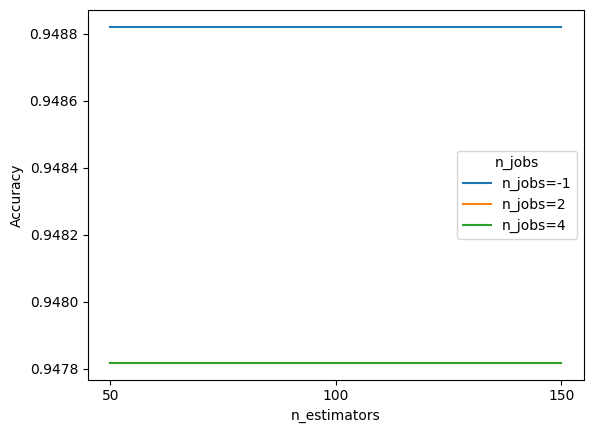

In [76]:
# Create a plot of accuracy vs. n_estimators and n_jobs
fig, ax = plt.subplots()
for i, n_jobs in enumerate(n_jobs_list):
    ax.plot(n_estimators_list, acc_list[i*len(n_estimators_list):(i+1)*len(n_estimators_list)], label=f"n_jobs={n_jobs}")
ax.set_xlabel("n_estimators")
ax.set_ylabel("Accuracy")
ax.set_xticks(n_estimators_list)
ax.legend(title="n_jobs")
plt.show()

b. Variation in performance of mean square error, root mean square error, and mean absolute error with different combinations of training and testing datasets:

### <font color='blue'> 6. Show the plots for <br> b. Variation in performance of mean square error, root mean square error, and mean absolute error with different combinations of training and testing datasets </font>

In [77]:
# Define different sizes of training and testing datasets
train_sizes = np.linspace(0.1, 0.9, 10)

# Initialize empty lists to store results
mse_list = []
rmse_list = []
mae_list = []

# Loop over different sizes of training and testing datasets
for train_size in train_sizes:
    print(f"Training model with train_size={train_size:.1f} and test_size={1-train_size:.1f}")
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=1)
    
    # Fit the model
    model = RandomForestRegressor(random_state=1)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Append results to the lists
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    
    print(f"MSE: {mse:.3f}\nRMSE: {rmse:.3f}\nMAE: {mae:.3f}\n")
  

Training model with train_size=0.1 and test_size=0.9
MSE: 0.048
RMSE: 0.219
MAE: 0.081

Training model with train_size=0.2 and test_size=0.8
MSE: 0.048
RMSE: 0.220
MAE: 0.089

Training model with train_size=0.3 and test_size=0.7
MSE: 0.048
RMSE: 0.219
MAE: 0.092

Training model with train_size=0.4 and test_size=0.6
MSE: 0.048
RMSE: 0.219
MAE: 0.093

Training model with train_size=0.5 and test_size=0.5
MSE: 0.046
RMSE: 0.214
MAE: 0.092

Training model with train_size=0.5 and test_size=0.5
MSE: 0.044
RMSE: 0.210
MAE: 0.088

Training model with train_size=0.6 and test_size=0.4
MSE: 0.045
RMSE: 0.212
MAE: 0.088

Training model with train_size=0.7 and test_size=0.3
MSE: 0.046
RMSE: 0.214
MAE: 0.089

Training model with train_size=0.8 and test_size=0.2
MSE: 0.052
RMSE: 0.228
MAE: 0.095

Training model with train_size=0.9 and test_size=0.1
MSE: 0.042
RMSE: 0.206
MAE: 0.082



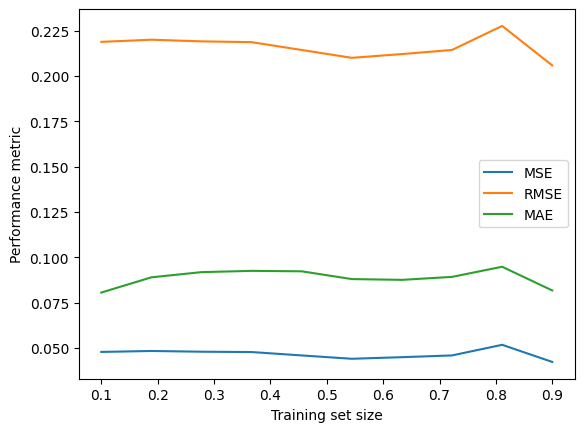

In [78]:
# Create a plot of performance metrics vs. training set size
fig, ax = plt.subplots()
ax.plot(train_sizes, mse_list, label="MSE")
ax.plot(train_sizes, rmse_list, label="RMSE")
ax.plot(train_sizes, mae_list, label="MAE")
ax.set_xlabel("Training set size")
ax.set_ylabel("Performance metric")
ax.legend()
plt.show()

### <font color='blue'> 6. Show the plots for <br> c. Variation in performance of mean square error, root mean square error, and mean absolute error with different combinations of a number of estimators and the number of jobs </font>

In [79]:
# Define the list of n_estimators and n_jobs to try
n_estimators_list = [50, 100, 150]
n_jobs_list = [-1, 2, 4]

# Initialize empty lists to store results
mse_list = []
rmse_list = []
mae_list = []

# Loop over all combinations of n_estimators and n_jobs
for n_estimators in n_estimators_list:
    for n_jobs in n_jobs_list:
        print(f"Training model with n_estimators={n_estimators} and n_jobs={n_jobs}")
        
        # Fit the model
        model = RandomForestRegressor(n_estimators=n_estimators, n_jobs=n_jobs, random_state=1)
        model.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Calculate performance metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Append results to the lists
        mse_list.append(mse)
        rmse_list.append(rmse)
        mae_list.append(mae)
        
        print(f"MSE: {mse:.3f}\nRMSE: {rmse:.3f}\nMAE: {mae:.3f}\n")



Training model with n_estimators=50 and n_jobs=-1
MSE: 0.042
RMSE: 0.206
MAE: 0.082

Training model with n_estimators=50 and n_jobs=2
MSE: 0.042
RMSE: 0.206
MAE: 0.082

Training model with n_estimators=50 and n_jobs=4
MSE: 0.042
RMSE: 0.206
MAE: 0.082

Training model with n_estimators=100 and n_jobs=-1
MSE: 0.042
RMSE: 0.206
MAE: 0.082

Training model with n_estimators=100 and n_jobs=2
MSE: 0.042
RMSE: 0.206
MAE: 0.082

Training model with n_estimators=100 and n_jobs=4
MSE: 0.042
RMSE: 0.206
MAE: 0.082

Training model with n_estimators=150 and n_jobs=-1
MSE: 0.042
RMSE: 0.204
MAE: 0.082

Training model with n_estimators=150 and n_jobs=2
MSE: 0.042
RMSE: 0.204
MAE: 0.082

Training model with n_estimators=150 and n_jobs=4
MSE: 0.042
RMSE: 0.204
MAE: 0.082



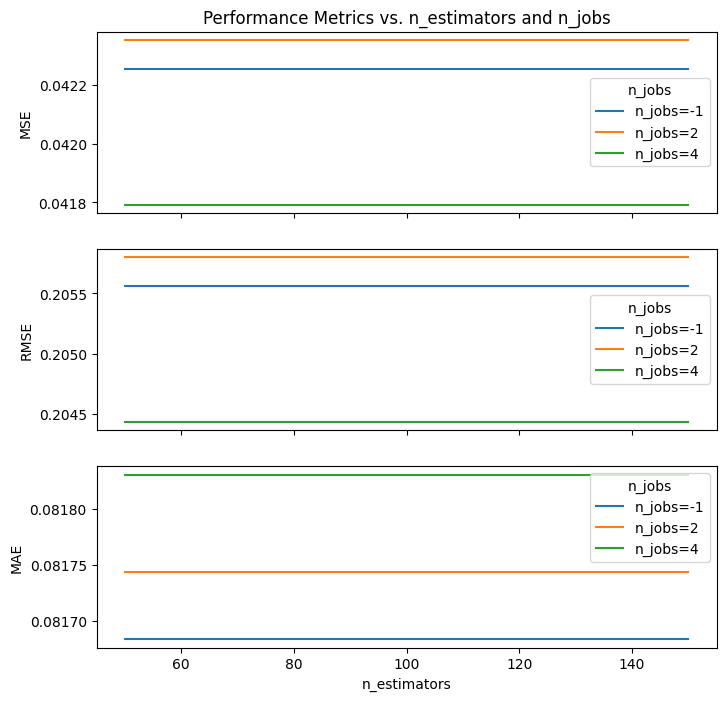

In [80]:
# Create a plot of performance metrics vs. n_estimators and n_jobs
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8,8))
axs[0].set_title('Performance Metrics vs. n_estimators and n_jobs')

for i, metric in enumerate(['MSE', 'RMSE', 'MAE']):
    for j, n_jobs in enumerate(n_jobs_list):
        axs[i].plot(n_estimators_list, eval(f'{metric.lower()}_list')[j*len(n_estimators_list):(j+1)*len(n_estimators_list)], label=f"n_jobs={n_jobs}")
    axs[i].set_ylabel(metric)
    axs[i].legend(title="n_jobs")

axs[-1].set_xlabel("n_estimators")
plt.show()